In [3]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [4]:
# 2. Đọc file dữ liệu GRAB và chia train test validate theo tỉ lệ 6-3-1
df = pd.read_csv('FPT_Historical_Data.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [5]:
!pip install pmdarima

You should consider upgrading via the 'C:\Users\ngomi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15922.699, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15932.297, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15932.553, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15932.534, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15935.715, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15936.465, Time=0.95 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15936.449, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15924.422, Time=1.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15940.313, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15934.526, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15938.403, Time=0.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15938.228, Time=0.66 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=15927.459, Time=2.36 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=15925.727, Time=1.40 sec

Best model:  ARIMA

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [7]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))


In [8]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted Opening prices for the next 30 days
print('Predicted Opening prices for the next 30 days:')
print(y_next_30_days)

Predicted Opening prices for the next 30 days:
[53785.03414013 53825.52824143 53992.00476571 54163.29590493
 54222.12566362 54159.67528665 54076.13030265 54083.75568504
 54205.72934406 54361.44982849 54445.60228726 54423.96704302
 54359.19863215 54348.26896693 54433.46662181 54568.29525971
 54665.04011989 54675.96087331 54633.26118252 54614.89587754
 54671.79555933 54784.16946238 54883.97906104 54919.01851161
 54898.50864369 54880.70009166 54917.48899003 55008.45874454
 55104.79068245 55156.17501934]


In [9]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 30433.63480760636
Testing RMSE: 14507.758412166786
Validation MAE: 29994.76523629421
Testing MAE: 12679.986249699605
Validation MAPE: 34.06801944118117
Testing MAPE: 15.892911447948846


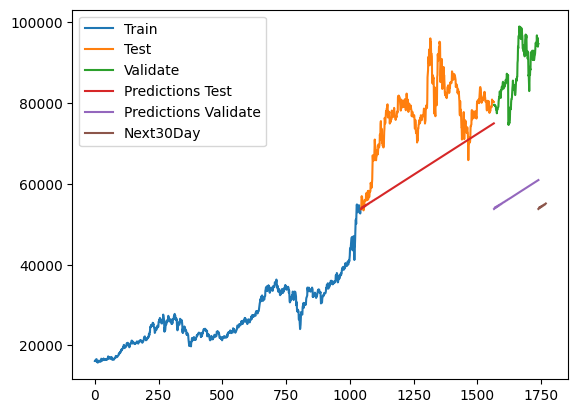

In [10]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Day'])
plt.show()

In [11]:
test_data.index

RangeIndex(start=1044, stop=1566, step=1)